In [96]:
import keras
import tensorflow as tf

import os
import time 
import numpy as np
import pandas as pd
from datetime import datetime 

from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# Saving in Colab
# os.getcwd()
# %cd /content/gdrive/My Drive/MSDS422_weeksix
# !pwd
# !ls
# print('Working Directory')
# # print(os.getcwd())
# work_dir = "/content/gdrive/My Drive/MSDS422_weeksix"
# chp_id = "ann"

In [ ]:
# # Saving models locally after fitting
# save_dir = "/results/"
# model_name = 'keras_mnist_model_1.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

In [ ]:
# # Loading saved model
# mnist_model = load_model()
# scores = mnist_model.evaluate(X_test, Y_test, verbose=2)

# Load data

In [114]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# Examine shape and data type
print(X_train.shape)
# (60000, 28, 28)
print(X_train.dtype)
# dtype('uint8')

(60000, 784)
float32


In [5]:
# Confirm that all 256 values between the min-max of 0-255 exist in the train set
len(np.unique(X_train))

256

In [1]:
# Plot distribtion of test and train
def dist_plot(var1, var2, var3):
    plt.figure(figsize=(6, 4))
    tmp_plt=sns.countplot(var1, palette="muted").set_title(var2)
    tmp_fig = tmp_plt.get_figure()
    tmp_fig.savefig(var3 + ".png", 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)
    return(tmp_plt)

**Figure 1: Train Digit Distribution**

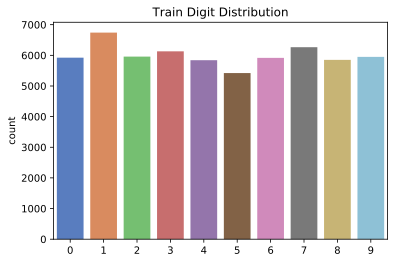

In [253]:
mn_plt_trn=dist_plot(y_train, 'Train Digit Distribution', "TrainDistMNIST")

**Figure 2: Test Digit Distribution**

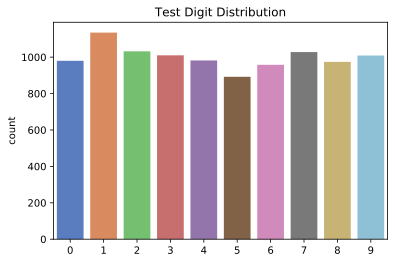

In [254]:
mn_plt_test=dist_plot(y_test, 'Test Digit Distribution', "TestDistMNIST")

In [115]:
# # One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Validation data
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

# Experiment design
Baseline: simple multilayer perceptron
- 2 layers, 784 neurons

Model 2 simple multi-layer perceptron
- 4 layers, 784 neurons

Model 3:<br>
- Simple convolutional neural net

Model 4:<br>
- Simple convolutional neural net with batch normalization

Network Architecture:<br>
<img src="nna.png">

### Model 1: baseline 
Simple multi-layer perceptron<br>
- 2 layers, 784 neurons

In [117]:
Define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fit the model
model = baseline_model()
model = load_model('results/keras_mnist_model_1.h5')
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=200, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# # Saving models locally after fitting
# save_dir = "results/"
# model_name = 'keras_mnist_model_1.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)
# print('--------------------------')

# # Final evaluation of the model
# Loading saved model
# mnist_model = load_model('results/keras_mnist_model_1.h5')
# scores = mnist_model.evaluate(X_test, y_test, verbose=0)

# # Load current model
# scores = model.evaluate(X_test, y_test, verbose=0)

print('Testing scores:')
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy score: %.4f%%" % scores[1])
print("Loss: %.4f%%" % scores[0])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 7s - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0568 - val_acc: 0.9832
Epoch 2/10
 - 6s - loss: 0.0042 - acc: 0.9996 - val_loss: 0.0565 - val_acc: 0.9844
Epoch 3/10
 - 6s - loss: 0.0032 - acc: 0.9997 - val_loss: 0.0608 - val_acc: 0.9834
Epoch 4/10
 - 6s - loss: 0.0030 - acc: 0.9997 - val_loss: 0.0609 - val_acc: 0.9856
Epoch 5/10
 - 6s - loss: 0.0065 - acc: 0.9985 - val_loss: 0.0696 - val_acc: 0.9830
Epoch 6/10
 - 6s - loss: 0.0088 - acc: 0.9975 - val_loss: 0.0749 - val_acc: 0.9822
Epoch 7/10
 - 6s - loss: 0.0060 - acc: 0.9984 - val_loss: 0.0681 - val_acc: 0.9838
Epoch 8/10
 - 6s - loss: 0.0016 - acc: 0.9998 - val_loss: 0.0631 - val_acc: 0.9844
Epoch 9/10
 - 6s - loss: 6.7766e-04 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0.9858
Epoch 10/10
 - 6s - loss: 4.7501e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9842
--------------------------
Training time in seconds:  58.21
--------------------------
Testing scores:
Baseline 

In [130]:
# Model architecture
model = baseline_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


**Figure 3: Learning Curves - Model 1**

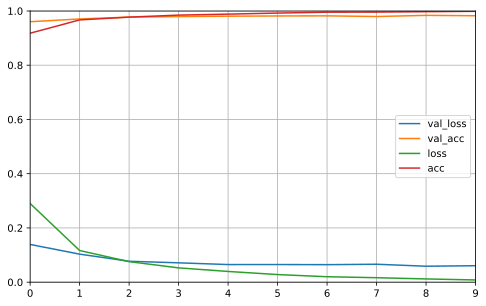

In [17]:
# Plot learning curves for baseline model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Figure 4: Confusion Matrix - Model 1**

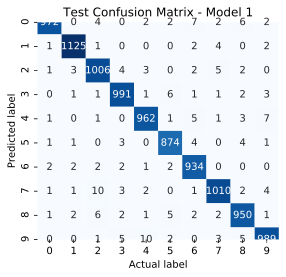

In [82]:
# Confusion matrix

# Reverse one hot encoding for y_test
y_test_rev = np.argmax(y_test, axis=1, out=None)

# Predictions
y_pred = model.predict_classes(X_test)

#  Plot
m1_tst = confusion_matrix(y_test_rev, y_pred)
m1_tst_plt=sns.heatmap(m1_tst.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Test Confusion Matrix - Model 1");

In [97]:
# Model prediction on Kaggle test data
X_kaggle = pd.read_csv("test.csv")

# predictions = model.predict_classes(X_kaggle, verbose=0)

# Using saved model
mnist_model = load_model('results/keras_mnist_model_1.h5')
predictions = mnist_model.predict_classes(X_kaggle, verbose=0)

# Submission
submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
    "Label": predictions})

submissions.to_csv("MLP1_CB.csv", index=False, header=True)

**Kaggle submission for Model 1**
**Kaggle ID: Claire Boetticher**<br>
**Kaggle username: clairence**

<img src = "MLP1.png">

### Model 2 training and evaluation

In [118]:
# Model 2
def model_2():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')),
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')),
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fit the model
model = model_2()
# model = load_model('results/keras_mnist_model_2.h5')
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=200, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# # Saving models locally after fitting
# save_dir = "results/"
# model_name = 'keras_mnist_model_2.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)
# print('--------------------------')

# # Final evaluation of the model
# # Loading saved model
mnist_model = load_model('results/keras_mnist_model_2.h5')
scores = mnist_model.evaluate(X_test, y_test, verbose=0)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy score: %.4f%%" % scores[1])
print("Loss: %.4f%%" % scores[0])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 12s - loss: 0.0099 - acc: 0.9966 - val_loss: 0.0821 - val_acc: 0.9818
Epoch 2/10
 - 11s - loss: 0.0114 - acc: 0.9966 - val_loss: 0.0779 - val_acc: 0.9852
Epoch 3/10
 - 10s - loss: 0.0110 - acc: 0.9964 - val_loss: 0.0813 - val_acc: 0.9850
Epoch 4/10
 - 10s - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0887 - val_acc: 0.9826
Epoch 5/10
 - 11s - loss: 0.0074 - acc: 0.9973 - val_loss: 0.0923 - val_acc: 0.9830
Epoch 6/10
 - 10s - loss: 0.0122 - acc: 0.9962 - val_loss: 0.1052 - val_acc: 0.9794
Epoch 7/10
 - 10s - loss: 0.0055 - acc: 0.9983 - val_loss: 0.0891 - val_acc: 0.9838
Epoch 8/10
 - 10s - loss: 0.0049 - acc: 0.9984 - val_loss: 0.0905 - val_acc: 0.9822
Epoch 9/10
 - 10s - loss: 0.0105 - acc: 0.9970 - val_loss: 0.1017 - val_acc: 0.9844
Epoch 10/10
 - 11s - loss: 0.0095 - acc: 0.9971 - val_loss: 0.0872 - val_acc: 0.9846
--------------------------
Training time in seconds:  105.02
--------------------------
Testing scores:
Baseli

In [131]:
# Model architecture
model = model_2()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_25 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________


**Figure 5: Learning Curves - Model 2**

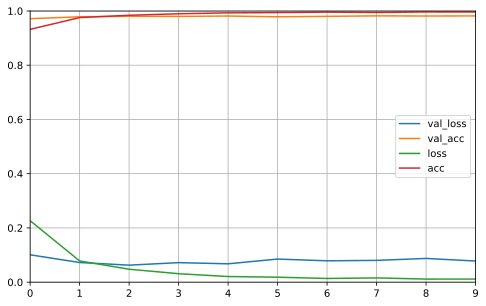

In [84]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Figure 6: Confusion Matrix - Model 2**

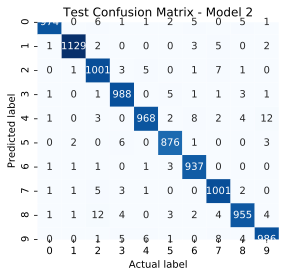

In [85]:
# Confusion matrix

# Reverse one hot encoding for y_test
# y_test_rev = np.argmax(y_test, axis=1, out=None)

# Predictions
y_pred = model.predict_classes(X_test)

#  Plot
m1_tst = confusion_matrix(y_test_rev, y_pred)
m1_tst_plt=sns.heatmap(m1_tst.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Test Confusion Matrix - Model 2");

In [98]:
# Model prediction on Kaggle test data
X_kaggle = pd.read_csv("test.csv")

# Current model
# predictions = model.predict_classes(X_kaggle, verbose=0)

# Using saved model
mnist_model = load_model('results/keras_mnist_model_2.h5')
predictions = mnist_model.predict_classes(X_kaggle, verbose=0)

# Submission
submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
    "Label": predictions})

submissions.to_csv("MLP2_CB.csv", index=False, header=True)

**Kaggle submission for Model 2**
**Kaggle ID: Claire Boetticher**<br>
**Kaggle username: clairence**

<img src = "MLP2.png">

### Model 3: simple CNN training and evaluation

In [100]:
# Data prep for CNN
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Validation data
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [101]:
def model_3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fit the model
model = model_3()
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=200, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Saving models locally after fitting
save_dir = "results/"
model_name = 'keras_mnist_model_3.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

# # Final evaluation of the model
# # Loading saved model
# mnist_model = load_model('results/keras_mnist_model_2.h5')
# scores = mnist_model.evaluate(X_test, Y_test, verbose=0)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy score: %.4f%%" % scores[1])
print("Loss: %.4f%%" % scores[0])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 12s - loss: 0.3221 - acc: 0.9024 - val_loss: 0.1537 - val_acc: 0.9554
Epoch 2/10
 - 10s - loss: 0.1492 - acc: 0.9561 - val_loss: 0.1193 - val_acc: 0.9638
Epoch 3/10
 - 10s - loss: 0.1089 - acc: 0.9683 - val_loss: 0.0931 - val_acc: 0.9756
Epoch 4/10
 - 11s - loss: 0.0842 - acc: 0.9759 - val_loss: 0.0803 - val_acc: 0.9772
Epoch 5/10
 - 10s - loss: 0.0724 - acc: 0.9786 - val_loss: 0.0693 - val_acc: 0.9800
Epoch 6/10
 - 11s - loss: 0.0604 - acc: 0.9826 - val_loss: 0.0673 - val_acc: 0.9816
Epoch 7/10
 - 12s - loss: 0.0524 - acc: 0.9840 - val_loss: 0.0614 - val_acc: 0.9826
Epoch 8/10
 - 11s - loss: 0.0458 - acc: 0.9869 - val_loss: 0.0567 - val_acc: 0.9836
Epoch 9/10
 - 11s - loss: 0.0401 - acc: 0.9885 - val_loss: 0.0563 - val_acc: 0.9836
Epoch 10/10
 - 11s - loss: 0.0356 - acc: 0.9898 - val_loss: 0.0549 - val_acc: 0.9854
--------------------------
Training time in seconds:  109.39
--------------------------
Saved trained model at

In [132]:
# Model architecture
model = model_3()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


**Figure 7: Learning Curves - Model 3**

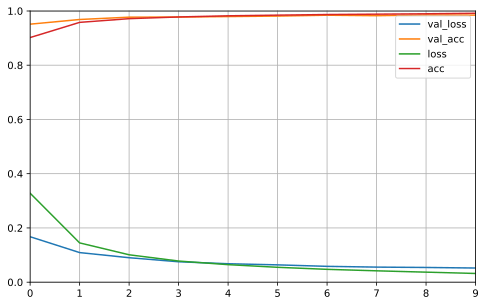

In [88]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Figure 8: Confusion Matrix - Model 3**

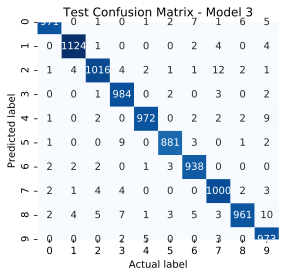

In [89]:
# Confusion matrix

# Reverse one hot encoding for y_test
# y_test_rev = np.argmax(y_test, axis=1, out=None)

# Predictions
y_pred = model.predict_classes(X_test)

#  Plot
m1_tst = confusion_matrix(y_test_rev, y_pred)
m1_tst_plt=sns.heatmap(m1_tst.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Test Confusion Matrix - Model 3");

In [111]:
# Model prediction on Kaggle test data
df_kaggle = pd.read_csv("test.csv").as_matrix()

print('Dimensions of the dataframe', df_kaggle.shape)

# Reshape to be samples pixels width, height
X_kaggle = df_kaggle.reshape(df_kaggle.shape[0], 28, 28, 1).astype('float32')

# Normalize_inputs
X_kaggle = X_kaggle/255.0

# Predict and create DataFrame
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_kaggle)):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid 
prediction["Label"] = model.predict_classes(X_kaggle, verbose=0)

# Output to csv
prediction.to_csv("CNN3_CB.csv", index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Dimensions of the dataframe (28000, 784)
   ImageId  Label
0        1      2
1        2      0


**Kaggle submission for Model 3**
**Kaggle ID: Claire Boetticher**<br>
**Kaggle username: clairence**

<img src = "CNN3.png">

In [ ]:
# # Model prediction on Kaggle test data
# X_kaggle = pd.read_csv("test.csv")

# X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

# X_kaggle = X_kaggle.reshape((X_test.shape[0], 28, 28, 1))
# # X_kaggle = X_kaggle.astype('float32') / 255.0

# # # Current model
# predictions = model.predict_classes(X_kaggle, verbose=0)

# # # Using saved model
# # # mnist_model = load_model('results/keras_mnist_model_3.h5')
# # # predictions = mnist_model.predict_classes(X_kaggle, verbose=0)

# # # Submission
# submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
#     "Label": predictions})

# submissions.to_csv("CNN3_CB.csv", index=False, header=True)

### Model 4: simple CNN with batch normalization training and evaluation

In [112]:
def model_4():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Fit the model
model = model_4()
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=200, verbose=2)
elapsed_time = time.time() - start_time
print('--------------------------')
print('Training time in seconds: ', round(elapsed_time,2))
print('--------------------------')

# Saving models locally after fitting
save_dir = "results/"
model_name = 'keras_mnist_model_4.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
print('--------------------------')

# # Final evaluation of the model
# # Loading saved model
# mnist_model = load_model('results/keras_mnist_model_4.h5')
# scores = mnist_model.evaluate(X_test, Y_test, verbose=0)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print('Testing scores:')
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Accuracy score: %.4f%%" % scores[1])
print("Loss: %.4f%%" % scores[0])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 27s - loss: 0.1823 - acc: 0.9464 - val_loss: 0.0842 - val_acc: 0.9762
Epoch 2/10
 - 20s - loss: 0.0622 - acc: 0.9833 - val_loss: 0.0652 - val_acc: 0.9802
Epoch 3/10
 - 21s - loss: 0.0401 - acc: 0.9899 - val_loss: 0.0538 - val_acc: 0.9846
Epoch 4/10
 - 19s - loss: 0.0279 - acc: 0.9934 - val_loss: 0.0476 - val_acc: 0.9852
Epoch 5/10
 - 19s - loss: 0.0197 - acc: 0.9962 - val_loss: 0.0465 - val_acc: 0.9870
Epoch 6/10
 - 19s - loss: 0.0141 - acc: 0.9979 - val_loss: 0.0450 - val_acc: 0.9868
Epoch 7/10
 - 20s - loss: 0.0104 - acc: 0.9987 - val_loss: 0.0428 - val_acc: 0.9888
Epoch 8/10
 - 20s - loss: 0.0078 - acc: 0.9995 - val_loss: 0.0409 - val_acc: 0.9878
Epoch 9/10
 - 19s - loss: 0.0062 - acc: 0.9996 - val_loss: 0.0414 - val_acc: 0.9884
Epoch 10/10
 - 19s - loss: 0.0049 - acc: 0.9999 - val_loss: 0.0413 - val_acc: 0.9882
--------------------------
Training time in seconds:  204.19
--------------------------
Saved trained model at

In [133]:
# Model architecture
model = model_4()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               540900    
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1010      
Total para

**Figure 9: Learning Curves - Model 4**

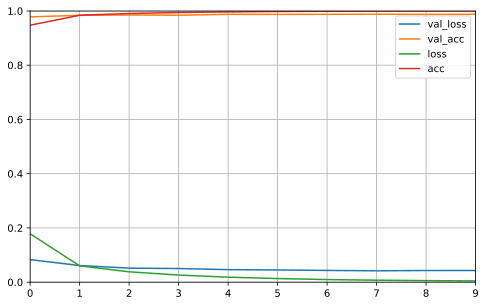

In [93]:
# Plot learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

**Figure 10: Confusion Matrix - Model 4**

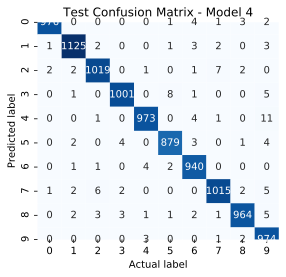

In [94]:
# Confusion matrix

# Reverse one hot encoding for y_test
# y_test_rev = np.argmax(y_test, axis=1, out=None)

# Predictions
y_pred = model.predict_classes(X_test)

#  Plot
m1_tst = confusion_matrix(y_test_rev, y_pred)
m1_tst_plt=sns.heatmap(m1_tst.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Test Confusion Matrix - Model 4");

In [113]:
# Model prediction on Kaggle test data
df_kaggle = pd.read_csv("test.csv").as_matrix()

print('Dimensions of the dataframe', df_kaggle.shape)

# Reshape to be samples pixels width, height
X_kaggle = df_kaggle.reshape(df_kaggle.shape[0], 28, 28, 1).astype('float32')

# Normalize_inputs
X_kaggle = X_kaggle/255.0

# Predict and create DataFrame
prediction = pd.DataFrame()
imageid = []
for i in range(len(X_kaggle)):
    i = i + 1
    imageid.append(i)
prediction["ImageId"] = imageid 
prediction["Label"] = model.predict_classes(X_kaggle, verbose=0)

# Output to csv
prediction.to_csv("CNN4_CB.csv", index=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Dimensions of the dataframe (28000, 784)


**Kaggle submission for Model 4**
**Kaggle ID: Claire Boetticher**<br>
**Kaggle username: clairence**

<img src = "CNN4.png">